In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Classification Analysis

In [5]:
df = pd.read_csv('vertebrate.csv')
df.head()

Name  Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  \
0   human             1            1                 0                0   
1  python             0            0                 0                0   
2  salmon             0            0                 1                0   
3   whale             1            1                 1                0   
4    frog             0            0                 1                0   

   Has Legs  Hibernates       Class  
0         1           0     mammals  
1         0           1    reptiles  
2         0           0      fishes  
3         0           0     mammals  
4         1           1  amphibians

In [6]:
#info about data
df.dtypes

Name                object
Warm-blooded         int64
Gives Birth          int64
Aquatic Creature     int64
Aerial Creature      int64
Has Legs             int64
Hibernates           int64
Class               object
dtype: object

In [7]:
print(f'Number of rows: {len(df)}')
print(f'Number of columns: {len(df.columns)}')

Number of rows: 15
Number of columns: 8


In [8]:
#Checking for any missing values
df.isna().sum()

Name                0
Warm-blooded        0
Gives Birth         0
Aquatic Creature    0
Aerial Creature     0
Has Legs            0
Hibernates          0
Class               0
dtype: int64

In [10]:
#Some summary statistics
df.describe()

Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  \
count     15.000000    15.000000         15.000000        15.000000   
mean       0.466667     0.400000          0.533333         0.133333   
std        0.516398     0.507093          0.516398         0.351866   
min        0.000000     0.000000          0.000000         0.000000   
25%        0.000000     0.000000          0.000000         0.000000   
50%        0.000000     0.000000          1.000000         0.000000   
75%        1.000000     1.000000          1.000000         0.000000   
max        1.000000     1.000000          1.000000         1.000000   

        Has Legs  Hibernates  
count  15.000000   15.000000  
mean    0.666667    0.333333  
std     0.487950    0.487950  
min     0.000000    0.000000  
25%     0.000000    0.000000  
50%     1.000000    0.000000  
75%     1.000000    1.000000  
max     1.000000    1.000000

In [15]:
obj_cols = df[['Name', 'Class']] 
obj_cols.describe()

Name    Class
count      15       15
unique     15        5
top     human  mammals
freq        1        5

<Axes: xlabel='Class', ylabel='count'>

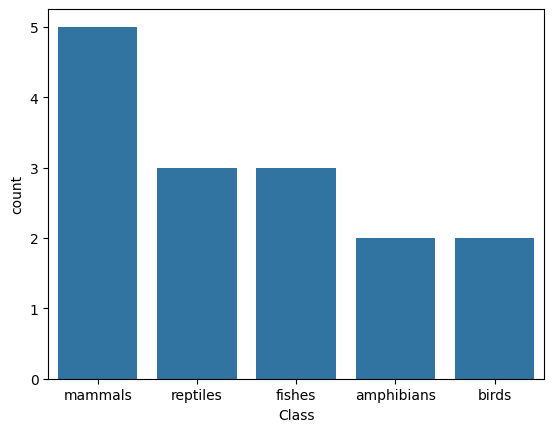

In [16]:
#Checking if the class labels are balanced (frequency)
#For this we can use a seaborn countplot (similar to bar chart)
sns.countplot(data= df, x='Class')

### Creating the Model

In [19]:
#Prior to creating the model, train and test splits should be created with labels and features
X = df.drop(['Class', 'Name'], axis = 1)
X.head()

Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  Has Legs  \
0             1            1                 0                0         1   
1             0            0                 0                0         0   
2             0            0                 1                0         0   
3             1            1                 1                0         0   
4             0            0                 1                0         1   

   Hibernates  
0           0  
1           1  
2           0  
3           0  
4           1

In [20]:
Y = df['Class']
Y.head()

0       mammals
1      reptiles
2        fishes
3       mammals
4    amphibians
Name: Class, dtype: object

In [21]:
Y.value_counts()

Class
mammals       5
reptiles      3
fishes        3
amphibians    2
birds         2
Name: count, dtype: int64

<Axes: >

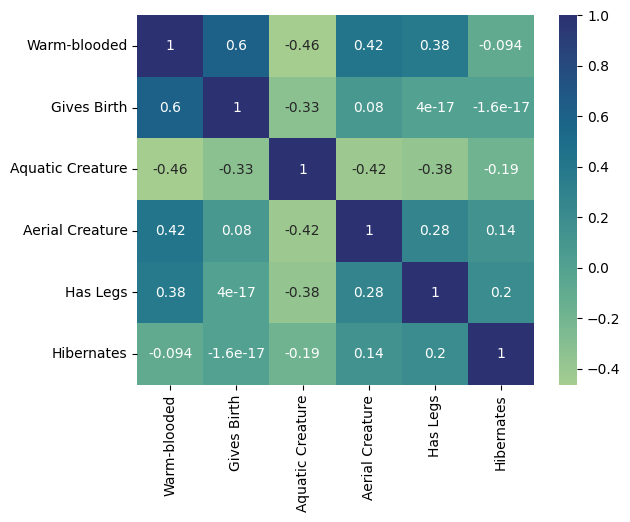

In [27]:
#Correlation between X varaibles
sns.heatmap(X.corr(), annot=True, cmap='crest')

In [29]:
#Splitting the train and test splits by importing sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.4) #40% of data will be used for testing

In [30]:
#Now the model instance will be initiated and the data will be fit to the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train) #Data is fit

DecisionTreeClassifier()

In [31]:
#Now using the trained model, we can use x_test data to get predictions and see its accuracy against y_test
y_preds = model.predict(X_test)
y_preds

array(['birds', 'amphibians', 'mammals', 'mammals', 'birds', 'mammals'],
      dtype=object)

In [32]:
#To measure the accuracy we need to use a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds)

In [33]:
#Let's get the Confusion matrix array
cm

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 2, 0],
       [1, 2, 0, 0, 0]])

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (4).

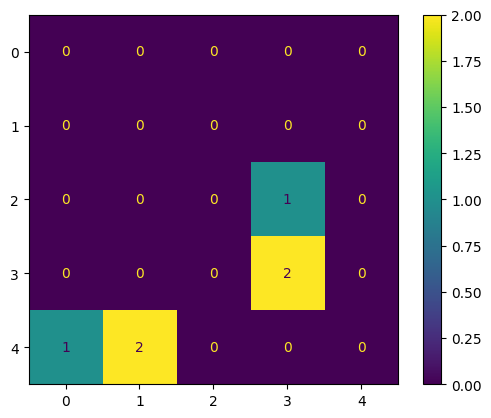

In [34]:
#Visualizing the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= model.classes_)
display.plot()
plt.show()

In [39]:
accuracy_df = pd.DataFrame({'Predictions':y_preds, 'Actuals':y_test})
accuracy_df

Predictions   Actuals
5        birds  reptiles
1   amphibians  reptiles
8      mammals   mammals
3      mammals   mammals
10       birds  reptiles
9      mammals    fishes

In [40]:
df['Class'].value_counts()

Class
mammals       5
reptiles      3
fishes        3
amphibians    2
birds         2
Name: count, dtype: int64

In [54]:
#let's add the accuracy
accuracy_df['Accurate?'] = accuracy_df['Predictions'] == accuracy_df['Actuals']
accuracy_df

Predictions   Actuals  Accurate?
5        birds  reptiles      False
1   amphibians  reptiles      False
8      mammals   mammals       True
3      mammals   mammals       True
10       birds  reptiles      False
9      mammals    fishes      False

### Getting the Tree

Visualizes the logic behind the classification

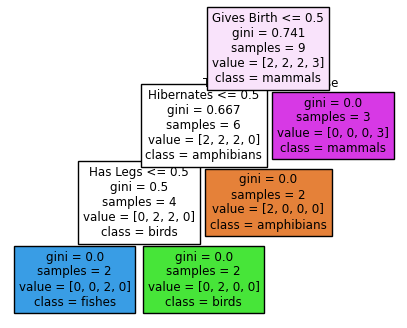

In [61]:
from sklearn import tree

fig = plt.figure(figsize=(5,4))
_=tree.plot_tree(model, feature_names = X.columns, class_names = model.classes_, filled= True)

In [58]:
model.classes_

array(['amphibians', 'birds', 'fishes', 'mammals'], dtype=object)

## Clustering Analysis

In [10]:
df2 = pd.read_csv('Data/Mall_Customers.csv')
df2.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [11]:
print(f'Number of rows: {len(df2)}')
print(f'Number of columns: {len(df2.columns)}')

Number of rows: 200
Number of columns: 5


In [12]:
#Checking for any missing values
df2.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
#Checking summary stats
df2.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [14]:
#Checking data types
df2.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [15]:
#Let's get the training set
#CustomerID will be dropped since it's a sequentially generated number which doesn't provide any value for the analysis
X= df2.drop('CustomerID', axis=1)
X.head()

Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

In [16]:
#Feature encoding for gender column so that it will be readable by the model we train
X.replace({'Male':0, 'Female':1}, inplace=True)
X.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_16912\1945511235.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Male':0, 'Female':1}, inplace=True)


Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      0   19                  15                      39
1      0   21                  15                      81
2      1   20                  16                       6
3      1   23                  16                      77
4      1   31                  17                      40

In [18]:
#Normalization is needed for the other columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm= pd.DataFrame(scaler.fit_transform(X), index=X.index, columns= X.columns) 
X_norm.head()

Genre       Age  Annual Income (k$)  Spending Score (1-100)
0 -1.128152 -1.424569           -1.738999               -0.434801
1 -1.128152 -1.281035           -1.738999                1.195704
2  0.886405 -1.352802           -1.700830               -1.715913
3  0.886405 -1.137502           -1.700830                1.040418
4  0.886405 -0.563369           -1.662660               -0.395980

Since the Gender is a binary classification we can ignore the normalized gender values since it might lead to inaccurate predictions

In [19]:
X_norm_2 = X_norm.drop('Genre',axis=1)
X_norm_2['Gender'] = X['Genre']
X_norm_2.head()

Age  Annual Income (k$)  Spending Score (1-100)  Gender
0 -1.424569           -1.738999               -0.434801       0
1 -1.281035           -1.738999                1.195704       0
2 -1.352802           -1.700830               -1.715913       1
3 -1.137502           -1.700830                1.040418       1
4 -0.563369           -1.662660               -0.395980       1

<Axes: >

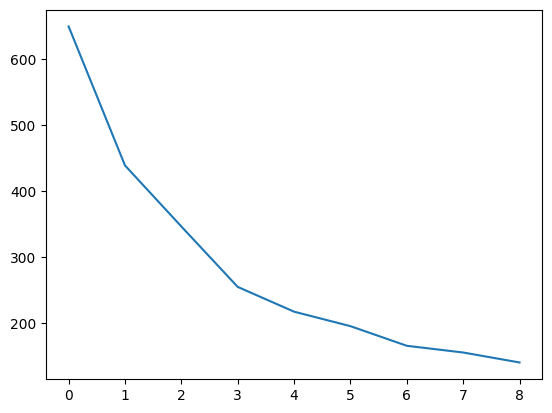

In [28]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X_norm_2)
    sse.append(kmeans.inertia_)

#Plotting the elbow plot
sns.lineplot(data= sse)

Since the number of clusters is doubtful, we can use `KneeLocator` from `Kneed` library to identify the exact number of clusters

In [29]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,10), sse, curve='convex', direction= 'decreasing')
k1.elbow

np.int64(4)

<Axes: >

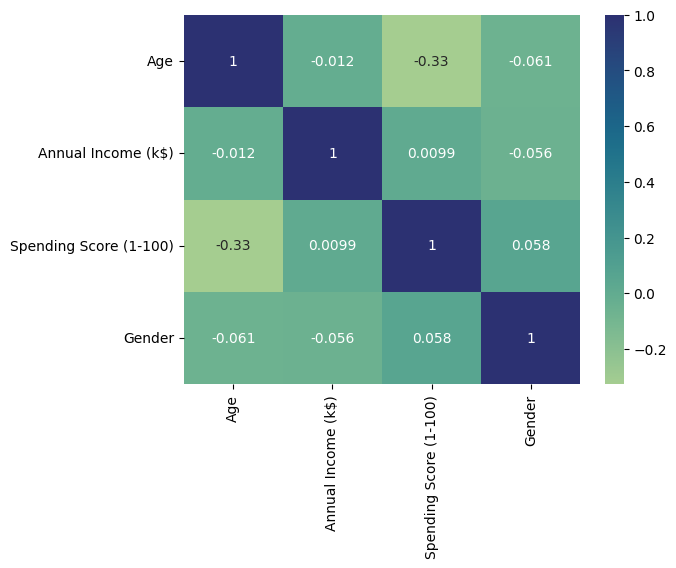

In [30]:
sns.heatmap(X_norm_2.corr(),annot=True, cmap='crest')

<Axes: >

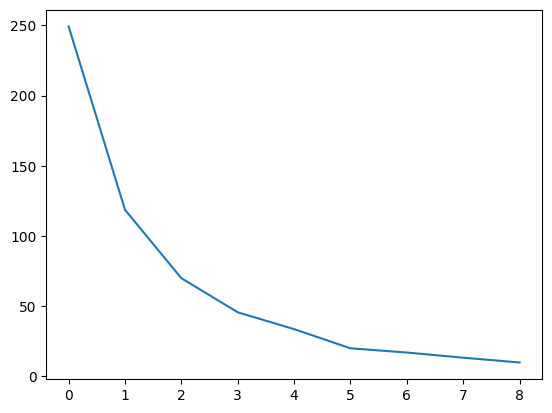

In [34]:
#Gender and Spending Score shows a strong correlation therefore the KMeans can be performed on them
new_X = X_norm_2.drop(['Age', 'Annual Income (k$)'],axis=1)

#Getting the elbow plot
sse_i = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=11)
    kmeans.fit(new_X)
    sse_i.append(kmeans.inertia_)

sns.lineplot(data=sse_i)

In [35]:
#Using KneeLocator to find the optimal clusters
k2= KneeLocator(range(1,10), sse_i, curve = 'convex', direction ='decreasing')
k2.elbow

np.int64(3)